In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm

Dados = pd.read_csv('churn_clientes.csv')
display(Dados.head())
#Dados.info()
Dados.describe()

/home/viniciusmonteiropina/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,id_cliente,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,...,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,7590-VHVEG,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,5575-GNVDE,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,...,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,3668-QPYBK,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,...,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,7795-CFOCW,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,...,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,9237-HQITU,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


,meses_na_empresa,valor_mensal,total_gasto
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [2]:
#Pegando valores Nao numeros do describe do banco de dados

Dados_nao_numericos = Dados.describe(exclude='number')
Dados_numericos =  Dados.describe(include='number')

In [3]:
#Dados['churn'].value_counts()
#tranformando os valores da soma em porcentagem 
Dados['churn'].value_counts(normalize=True) * 100 
Dados =  Dados.drop(columns='id_cliente',axis=1)


In [4]:
colunas_numericas = Dados.select_dtypes(include='number').columns
colunas_categoricas = Dados.select_dtypes(exclude='number').columns
print(colunas_numericas)
colunas_categoricas = colunas_categoricas.drop('churn')
print(colunas_categoricas)
Dados.head()

Index(['meses_na_empresa', 'valor_mensal', 'total_gasto'], dtype='object')
Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')


,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


#Começando com os Graficos no seaborn

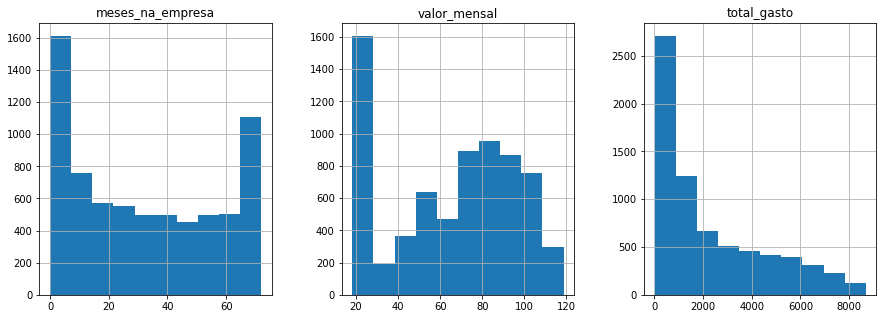

In [5]:
Dados[colunas_numericas].hist(figsize=(15,5),layout=(1,3)); #histogramas com os dados numericos

In [6]:
Dados['meses_na_empresa'].value_counts().sort_index() #ordenando meses em que os clientes estao na empresa

meses_na_empresa
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 73, dtype: int64

  0%|                                         | 20/7043 [00:00<03:06, 37.69it/s]


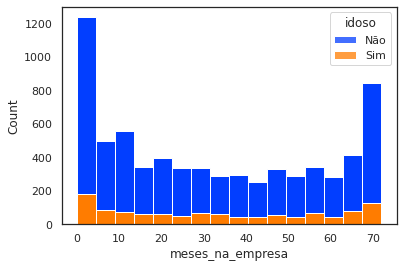

In [7]:
#sabendo quantos idosos tem na empresa
for dado in tqdm(Dados):
    sns.set_theme(style='white',palette='bright')
    sns.histplot(x='meses_na_empresa',hue='idoso',data=Dados,multiple='stack')

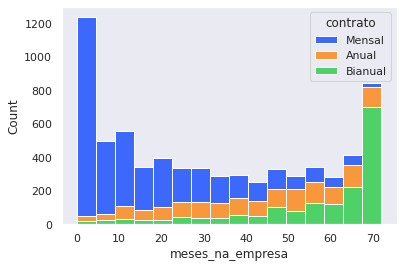

In [8]:
sns.set_theme(style='dark', palette='bright',context='notebook')
sns.histplot(x='meses_na_empresa', hue='contrato', data=Dados, multiple='stack');


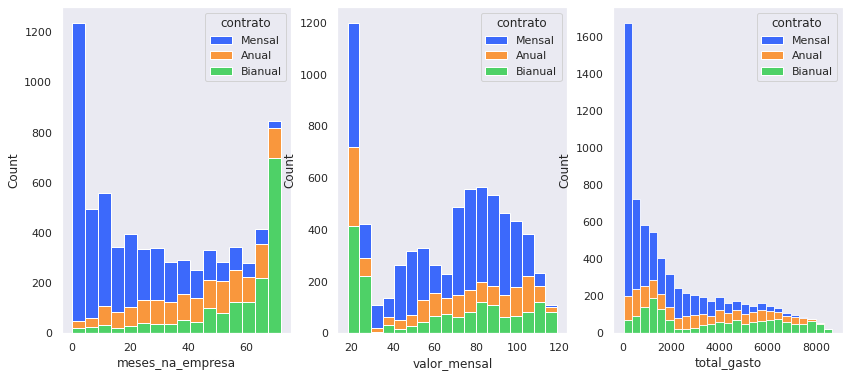

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna, hue='contrato', data=Dados, multiple='stack', ax=axs[i])

plt.show()

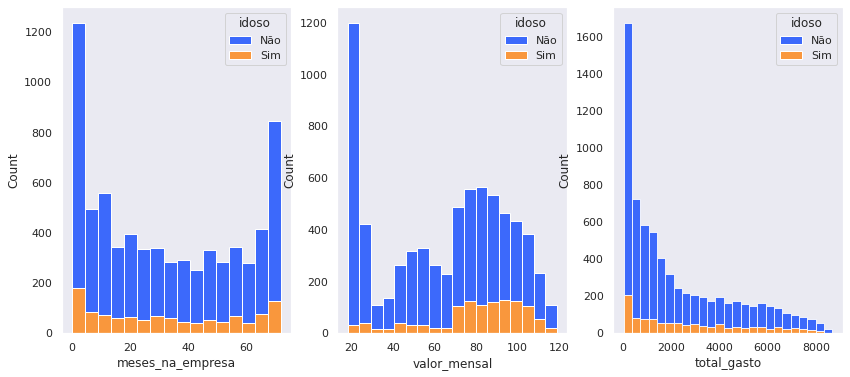

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna, hue='idoso', data=Dados,multiple='stack', ax=axs[i])

plt.show()

# introduçao ao KDE

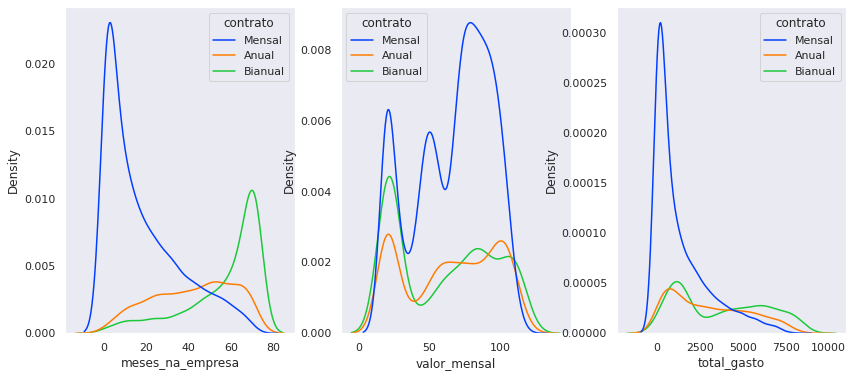

In [11]:
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(14,6))


for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna, hue='contrato', data=Dados, ax=axs[i]) 

plt.show()

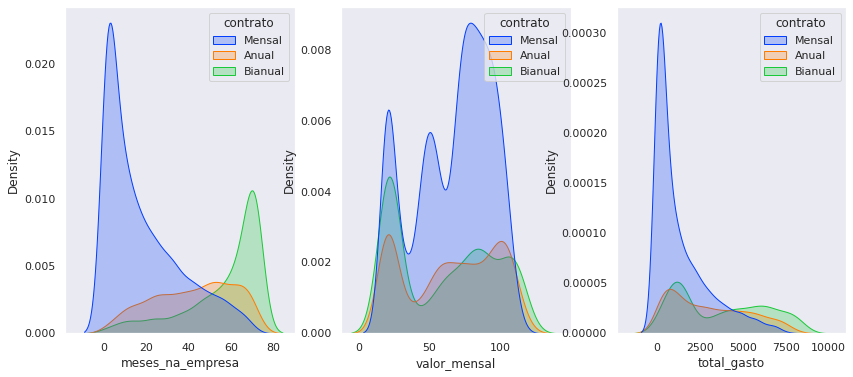

In [12]:
#Sabendo uais clientes tem verto mes na empresa, o uanto foi gasto e o valor mensal
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(14,6))


for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna, hue='contrato', data=Dados, ax=axs[i],fill=True) # fill para preencher as linhas

plt.show()

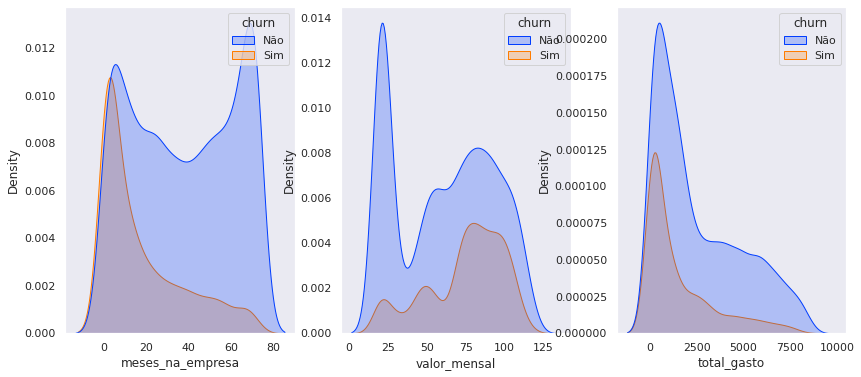

In [13]:
#Sabendo o crhun da empresa
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(14,6))


for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna, hue='churn', data=Dados, ax=axs[i],fill=True) # fill para preencher as linhas

plt.show()

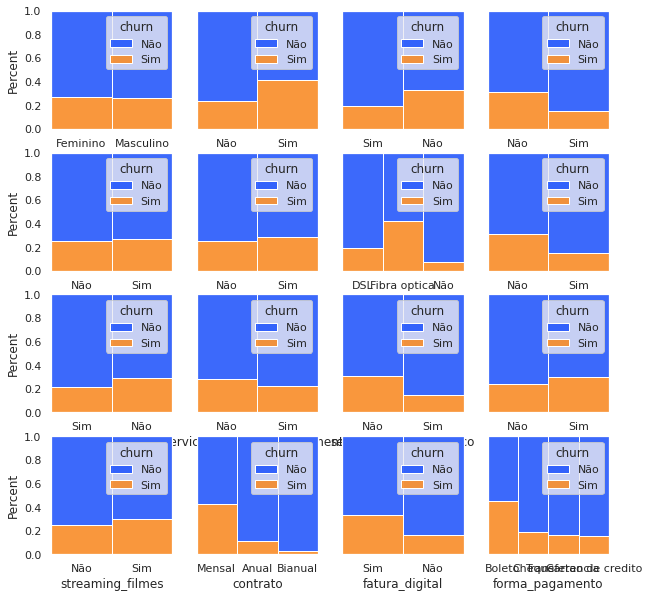

In [16]:
fig, axs = plt.subplots(nrows=4,ncols=4, figsize=(10,10),sharey=True) #sharey para compartilar op mesmo eixo y
for i,coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, hue='churn', data=Dados, multiple='fill', ax=axs.flat[i], stat='percent') #fill para 
    #completar as barras

plt.show()

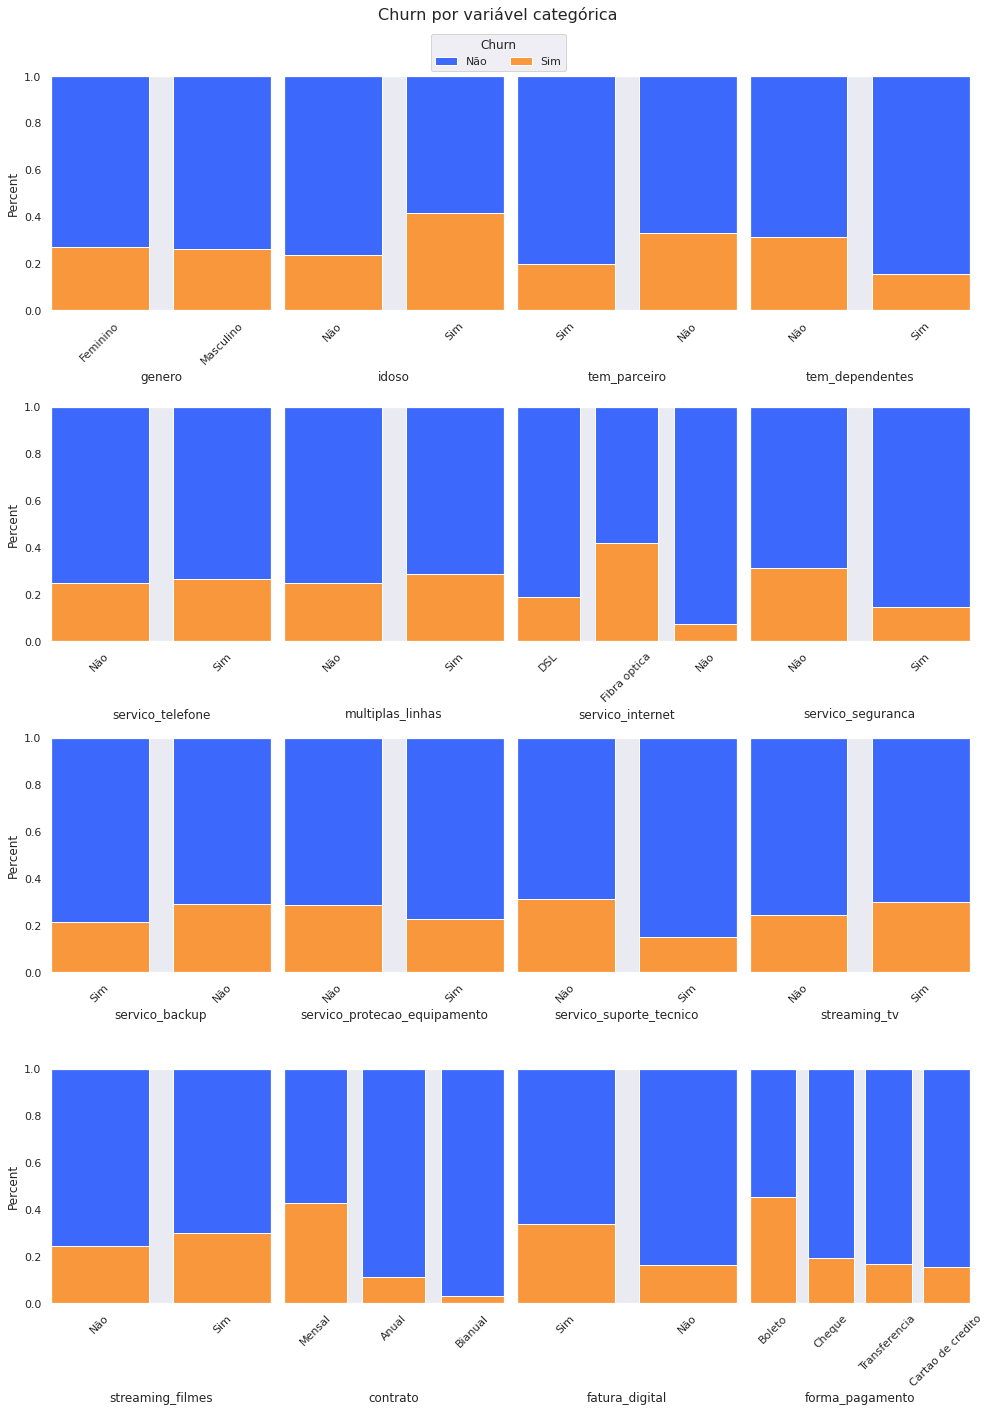

In [27]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 20), sharey=True, tight_layout=True) #tight_layout=True para
#arumar o layout das figuras
for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, hue='churn', data=Dados,multiple='fill', ax=axs.flat[i], stat='percent',
                     shrink=0.8,common_norm=True)
    h.tick_params(axis='x', labelrotation=45)
    h.grid(False)
    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]
fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Churn por variável categórica\n\n\n', fontsize=16)

fig.align_labels()

plt.show()


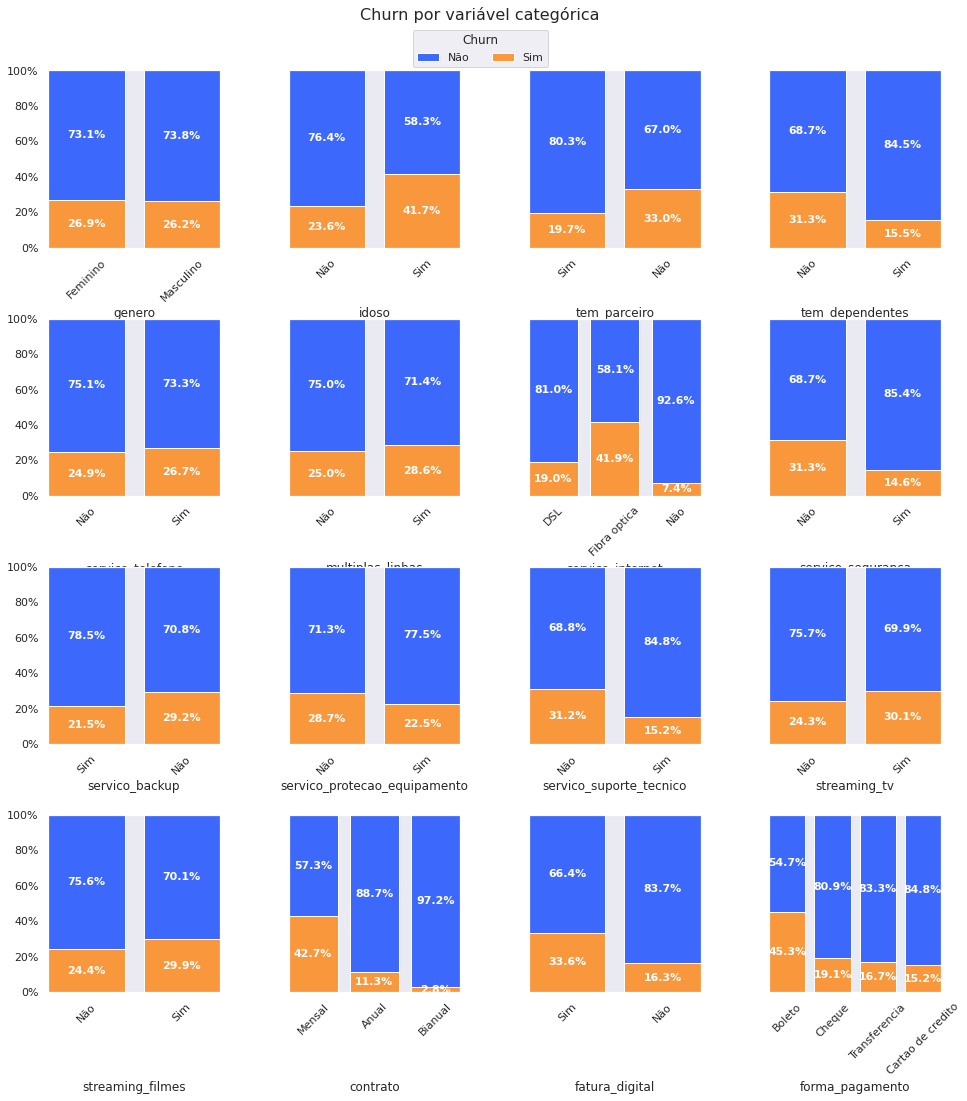

In [30]:
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), sharey=True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, hue='churn', data=Dados, multiple='fill', ax=axs.flat[i], stat='percent',
                     shrink=0.8)
    h.tick_params(axis='x', labelrotation=45)
    h.grid(False)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold', fontsize=11)

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Churn por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.925)

plt.show()